In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import itertools
from sklearn import svm, datasets

In [2]:
pokemon = pd.read_csv('Pokemon_nv.csv')
pokemon.head()

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,single_type,1,2,3,4,5,6
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False,0,1,0,0,0,0,0
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False,0,1,0,0,0,0,0
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,False,0,1,0,0,0,0,0
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False,0,1,0,0,0,0,0
4,4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,False,1,1,0,0,0,0,0


In [3]:
pokemon.drop(['Unnamed: 0', '#'], axis=1, inplace=True)

In [4]:
pokemon["Type 2"] = pokemon["Type 2"].fillna(pokemon["Type 1"])
pokemon["Type 1"] = pokemon["Type 1"].fillna(pokemon["single_type"])

In [5]:
y=pokemon['single_type'].values

In [6]:
X = pokemon.drop('single_type', axis=1)

In [7]:
X_train, X_test, y_train, y_test =train_test_split(X,y)

In [8]:
X_gen_train = X_train[['1', '2', '3', '4', '5', '6']]
X_gen_test = X_test[['1', '2', '3', '4', '5', '6']]

In [9]:
sc = StandardScaler()
no_response_var_data=X_train.drop(['Name', 'Type 1', 'Type 2', 'Legendary', '1', '2', '3', '4', '5', '6'],axis=1) ## Adding single type to the columns to drop
X_train_scaled=sc.fit_transform(no_response_var_data)

In [10]:
X_test_scaled=sc.transform(X_test.drop(['Name', 'Type 1', 'Type 2', 'Legendary', '1', '2', '3', '4', '5', '6'],axis=1))

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled,  columns=no_response_var_data.columns)

In [12]:
X_test_scaled = pd.DataFrame(X_test_scaled,  columns=no_response_var_data.columns)

In [14]:
X_train_scaled = pd.concat([X_train_scaled], axis=1)

In [15]:
X_test_scaled = pd.concat([X_test_scaled], axis=1)

In [17]:
X_gen_test_scaled = pd.DataFrame(X_test_scaled,  columns=no_response_var_data.columns)

In [19]:
X_gen_test_scaled = pd.concat([X_test_scaled], axis=1)

In [20]:
logistic = LogisticRegression() # We need to use a solver that can handle both L1 and L2 as the error suggested
pipe = Pipeline(steps=[('logistic', logistic)])

In [21]:
C = [0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2'] 
solver = ['liblinear']

parameters = dict(C=C, penalty=penalty, solver=solver)
cv = GridSearchCV(logistic, parameters, cv=5)

In [23]:
cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [24]:
cv.best_estimator_

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [27]:
cv.predict(X_test_scaled)

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1])

In [28]:
y_pred = cv.predict(X_test_scaled)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Accuracy: 0.565
Confusion matrix:
 [[60 40]
 [47 53]]
Classification report:
               precision    recall  f1-score   support

           0       0.56      0.60      0.58       100
           1       0.57      0.53      0.55       100

    accuracy                           0.56       200
   macro avg       0.57      0.56      0.56       200
weighted avg       0.57      0.56      0.56       200



In [30]:
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

In [31]:
class_names=['Attack','Defense','Sp. Att','Sp. Def']

Confusion matrix, without normalization
[[60 40]
 [43 57]]
Normalized confusion matrix
[[0.6  0.4 ]
 [0.43 0.57]]


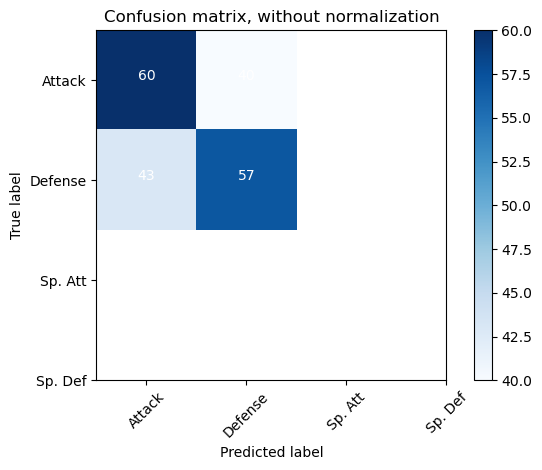

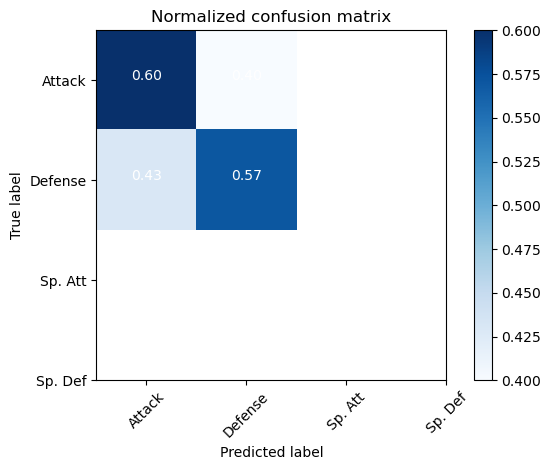

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

7


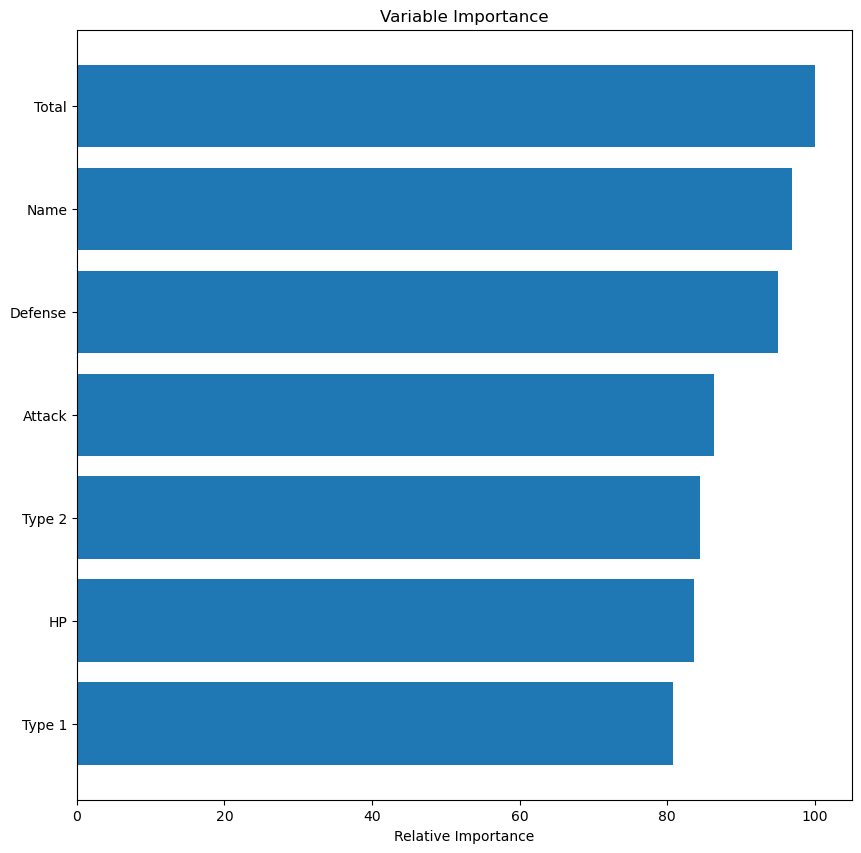

In [33]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, pokemon.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
#Resampling

In [34]:
sns.set()
random_seed_number = 42
np.random.seed(random_seed_number)

Correlation between various features


/var/folders/z7/vg64cvbj5jz8n8t6rtyrfgqm0000gn/T/ipykernel_68024/831851898.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p=sns.heatmap(pokemon.corr(), annot=True,cmap ='Blues')


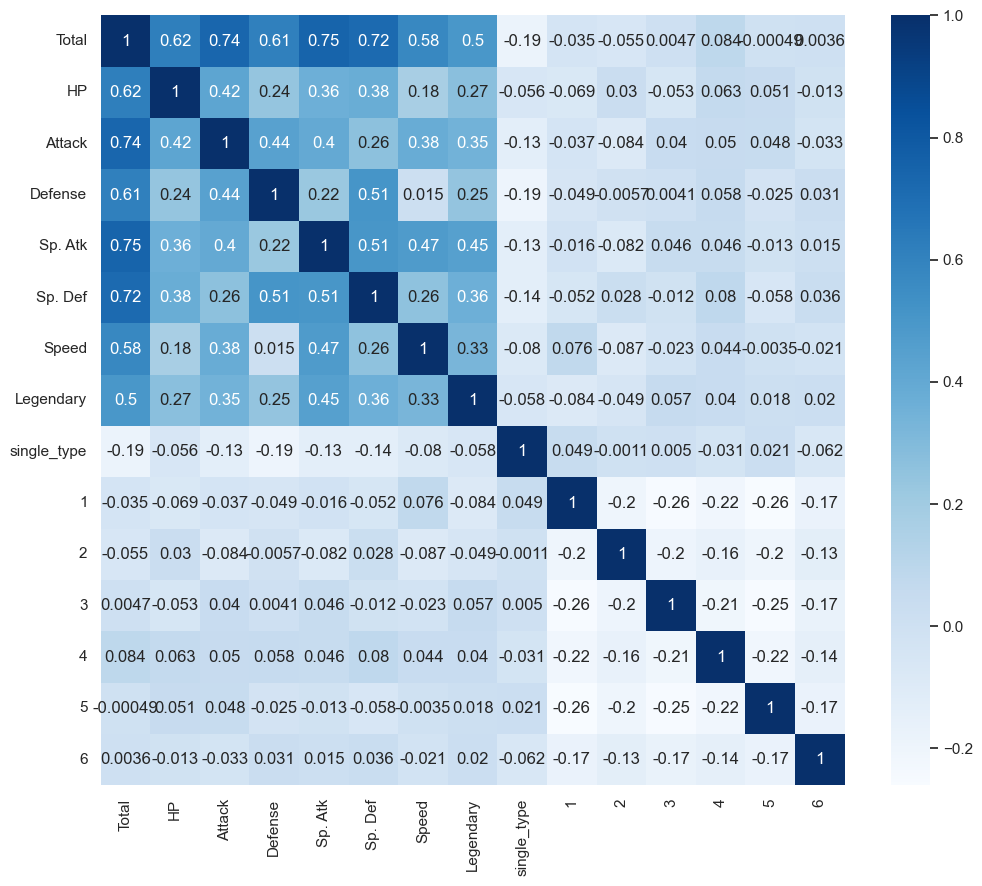

In [35]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(pokemon.corr(), annot=True,cmap ='Blues')

In [37]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))

In [38]:
print(train_scores)

print(test_scores)

[0.9933333333333333, 0.7866666666666666, 0.805, 0.7133333333333334, 0.7166666666666667, 0.6933333333333334, 0.675, 0.6666666666666666, 0.675]
[0.51, 0.475, 0.525, 0.54, 0.54, 0.53, 0.55, 0.545, 0.56]


In [39]:
print((train_scores.index(max(train_scores)) + 1),'neighbor/s')

1 neighbor/s


In [40]:
print((test_scores.index(max(test_scores)) + 1),'neighbor/s')

9 neighbor/s


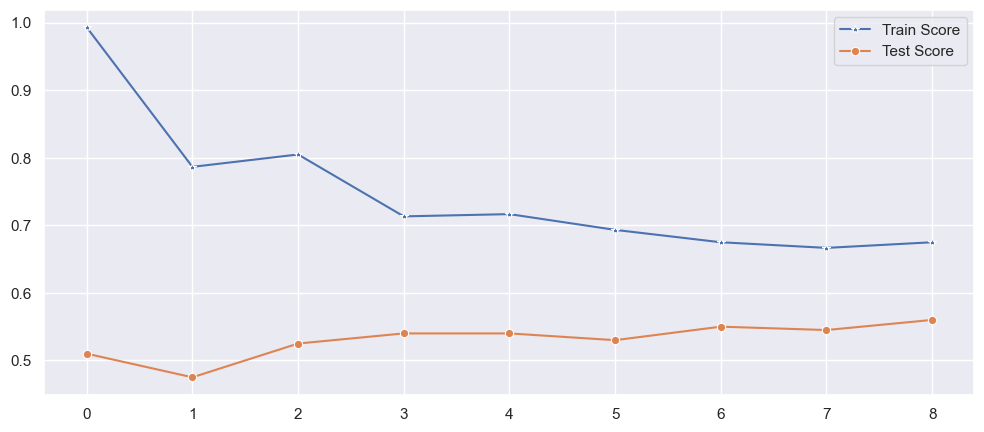

In [41]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')

In [42]:
knn = KNeighborsClassifier(7)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=7)

In [43]:
y_pred = knn.predict(X_test_scaled)
pl = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[62 38]
 [52 48]]


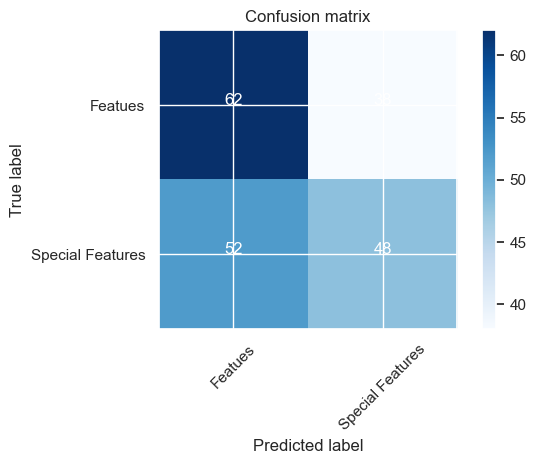

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    
class_names = ['Featues','Special Features']
plt.figure()
plot_confusion_matrix(pl, classes=class_names)

In [46]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.54      0.62      0.58       100\n           1       0.56      0.48      0.52       100\n\n    accuracy                           0.55       200\n   macro avg       0.55      0.55      0.55       200\nweighted avg       0.55      0.55      0.55       200\n'

In [50]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [51]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.5833333333333333
Best Parameters: {'n_neighbors': 46}


In [52]:
param_grid = {'n_estimators':np.arange(1,50)}
forest = RandomForestClassifier()
knn_cv= GridSearchCV(forest,param_grid,cv=5)
knn_cv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})